<a href="https://colab.research.google.com/github/Ravikrishnan05/Phoenix/blob/main/AI_ML_Hackathon_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Clone the hackathon dataset repository
!git clone https://github.com/sharad00004/AI-ML-HACKATHON-Datasets.git

# 2. Clone YOUR project repository where you will save your work
!git clone https://github.com/Ravikrishnan05/Phoenix.git

# 3. VERY IMPORTANT: Change the current directory to be inside your project repo
%cd Phoenix

Cloning into 'AI-ML-HACKATHON-Datasets'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 684.39 KiB | 4.03 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Cloning into 'Phoenix'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 7.82 KiB | 7.82 MiB/s, done.
/content/Phoenix


In [2]:
import os
import pandas as pd

# 1. Create the required directory structure for the hackathon
print("Creating project structure...")
os.makedirs("notebook", exist_ok=True)
os.makedirs("report", exist_ok=True)
os.makedirs("video", exist_ok=True)
os.makedirs("data", exist_ok=True)

# 2. Copy the dataset from the *original* cloned location into your project's data folder
# The source path is /content/AI-ML-HACKATHON-Datasets/
print("Copying dataset...")
!cp /content/AI-ML-HACKATHON-Datasets/electricity_bill_dataset.csv data/

# 3. Create the requirements.txt file
print("Creating requirements.txt...")
with open("requirements.txt", "w") as f:
    f.write("""pandas
numpy
scikit-learn
matplotlib
seaborn
lightgbm
""")

# 4. Create placeholder files (optional, but good practice)
open("report/README.md", "w").close()
open("report/model_summary.txt", "w").close()

# You will create the notebook and video later, so no need to create placeholders now.
# We will save the notebook directly into the `notebook` folder from the Colab interface.

# 5. Configure Git for this Colab session
!git config --global user.name "Ravikrishnan05"
!git config --global user.email "ravikrishnan1089@gmail.com"

# 6. Add all your new files and folders to Git
!git add .

# 7. Commit the changes
!git commit -m "Initial project setup for hackathon"

print("\nSetup complete. Your repository is ready.")
!ls -R

Creating project structure...
Copying dataset...
Creating requirements.txt...
[main bdb7b26] Initial project setup for hackathon
 4 files changed, 45352 insertions(+)
 create mode 100644 data/electricity_bill_dataset.csv
 create mode 100644 report/README.md
 create mode 100644 report/model_summary.txt
 create mode 100644 requirements.txt

Setup complete. Your repository is ready.
.:
AI_ML_Hackathon_Project.ipynb  notebook   report	    video
data			       README.md  requirements.txt

./data:
electricity_bill_dataset.csv

./notebook:

./report:
model_summary.txt  README.md

./video:


In [6]:
from getpass import getpass
import os

# Securely get your new Personal Access Token
# When you run this cell, it will give you a box to type your token in.
# It will look like you are typing a password (characters won't show).
my_token = getpass('Enter your GitHub PAT: ')

# Set the remote URL with the token included for authentication
# This is the correct and secure way to do it in Colab
!git remote set-url origin https://{my_token}@github.com/Ravikrishnan05/Phoenix.git

# Now, push your commit to the main branch on GitHub
print("\nPushing to GitHub...")
!git push origin main

Enter your GitHub PAT: ··········

Pushing to GitHub...
Enumerating objects: 8, done.
Counting objects: 100% (8/8), done.
Delta compression using up to 2 threads
Compressing objects: 100% (6/6), done.
Writing objects: 100% (7/7), 678.46 KiB | 3.63 MiB/s, done.
Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/Ravikrishnan05/Phoenix.git
   f0e5fc4..bdb7b26  main -> main


## Github done proceeding with EDA

In [7]:
#loading cdv file in df
df=pd.read_csv("/content/Phoenix/data/electricity_bill_dataset.csv")

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


In [10]:
df.describe()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate,ElectricityBill
count,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.0,45345.000000,45345.000000,45345.000000,45345.000000
mean,13.990694,21.705458,1.503959,12.502635,2.865057,0.0,6.488058,515.083207,8.369648,4311.771307
std,5.470816,1.672575,1.115482,5.756007,3.894933,0.0,3.443252,122.618017,0.576992,1073.886406
min,5.000000,17.000000,0.000000,3.000000,1.000000,0.0,1.000000,95.000000,7.400000,807.500000
25%,9.000000,22.000000,1.000000,7.000000,1.000000,0.0,3.000000,429.000000,7.900000,3556.800000
50%,14.000000,22.000000,2.000000,13.000000,1.000000,0.0,6.000000,515.000000,8.400000,4299.400000
75%,19.000000,23.000000,2.000000,17.000000,1.000000,0.0,9.000000,601.000000,8.900000,5038.800000
max,23.000000,23.000000,3.000000,22.000000,12.000000,0.0,12.000000,926.000000,9.300000,8286.300000


In [11]:
df.isnull().sum()

,0
Fan,0
Refrigerator,0
AirConditioner,0
Television,0
Monitor,0
MotorPump,0
Month,0
City,0
Company,0
MonthlyHours,0


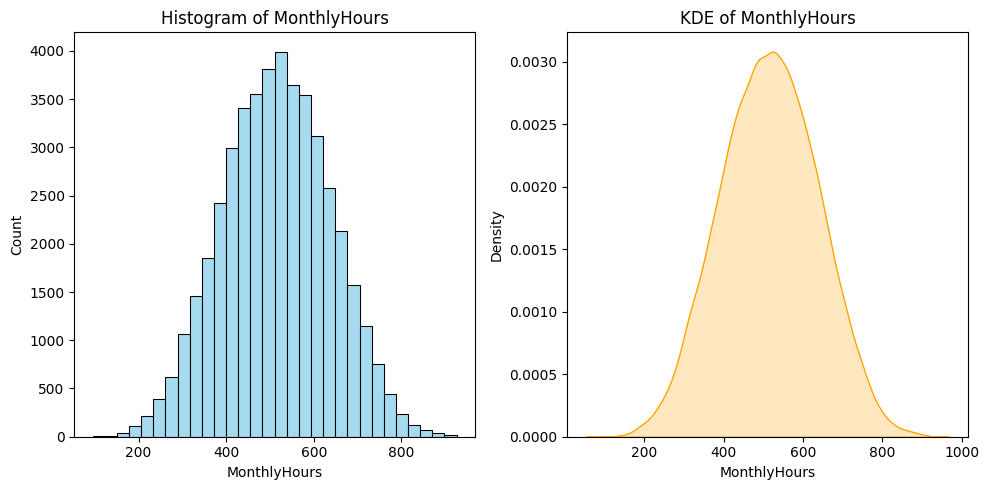

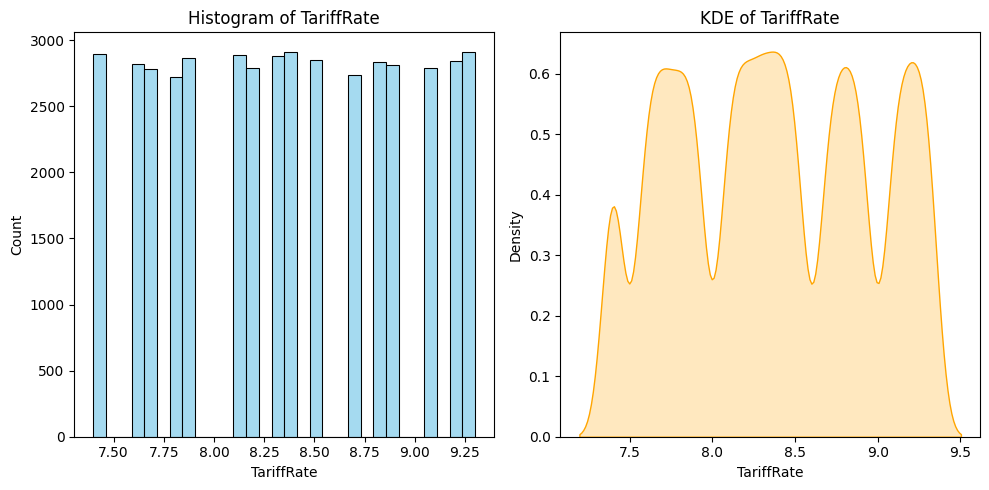

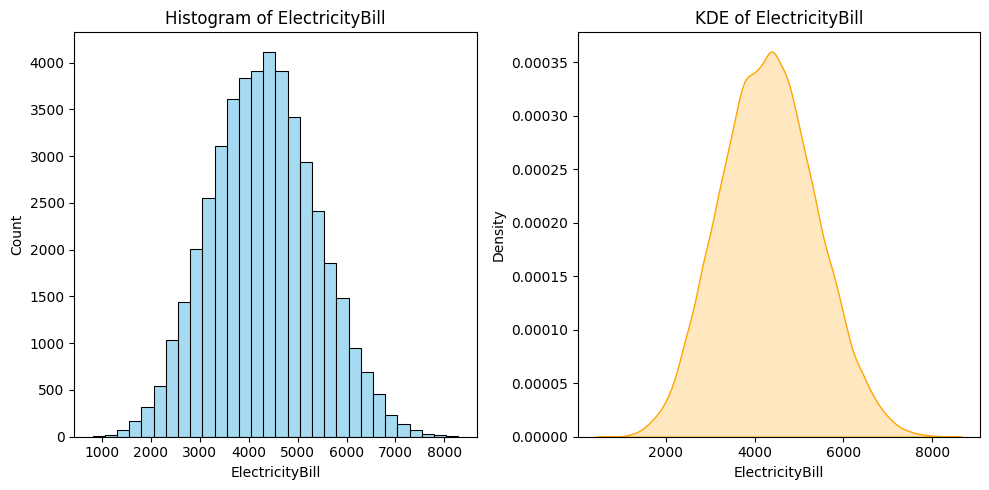

In [14]:
# List of numerical columns
numerical_cols = ['MonthlyHours', 'TariffRate', 'ElectricityBill']

# Plot histograms and KDE for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(10, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=False, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")

    # KDE
    plt.subplot(1, 2, 2)
    sns.kdeplot(df[col], fill=True, color='orange')
    plt.title(f'KDE of {col}')
    plt.xlabel(col)
    plt.ylabel("Density")

    plt.tight_layout()
    plt.show()

## ELectricty bill and Monthly hours are normally distributed.
## No outlinears in ELectricty bill,Monthly hours,Tariff Rate


/tmp/ipython-input-15-3912923304.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='City', palette='Set2')


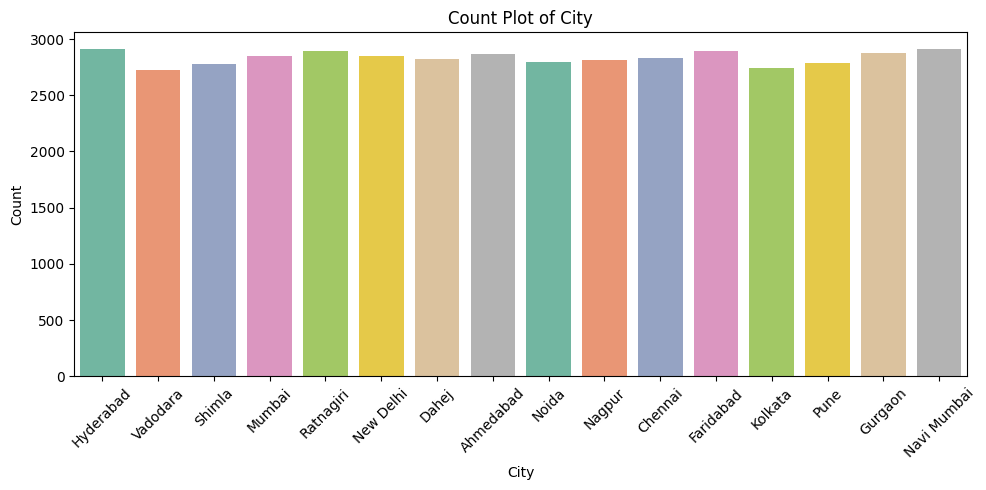

/tmp/ipython-input-15-3912923304.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Company', palette='Set3')


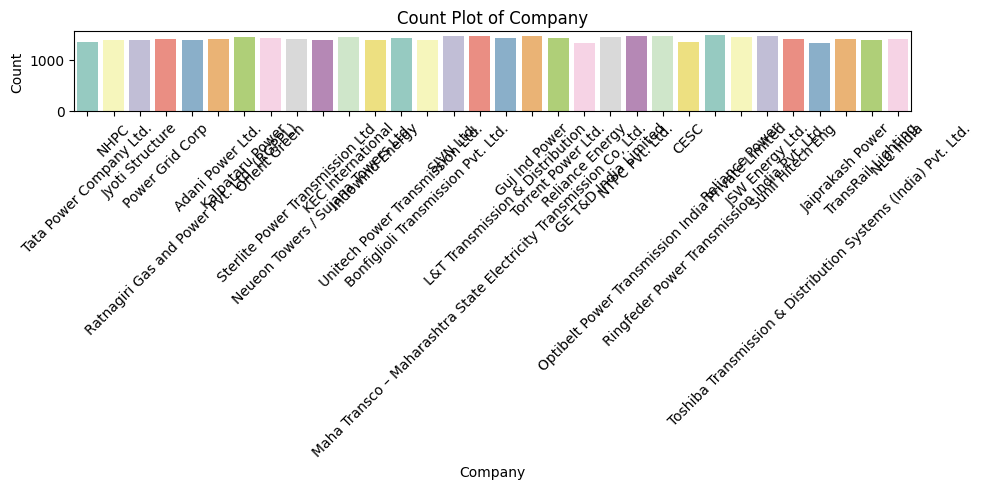

In [15]:
#Categorical: Create count plots for City and Company.
#Question to Answer: Is the data balanced? Are there dominant categories?
import seaborn as sns
import matplotlib.pyplot as plt

# Plot for 'City'
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='City', palette='Set2')
plt.title('Count Plot of City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for 'Company'
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Company', palette='Set3')
plt.title('Count Plot of Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data is balanced
# Count plot shows that the categorical data like company and cities are equally distributed.
> Add blockquote



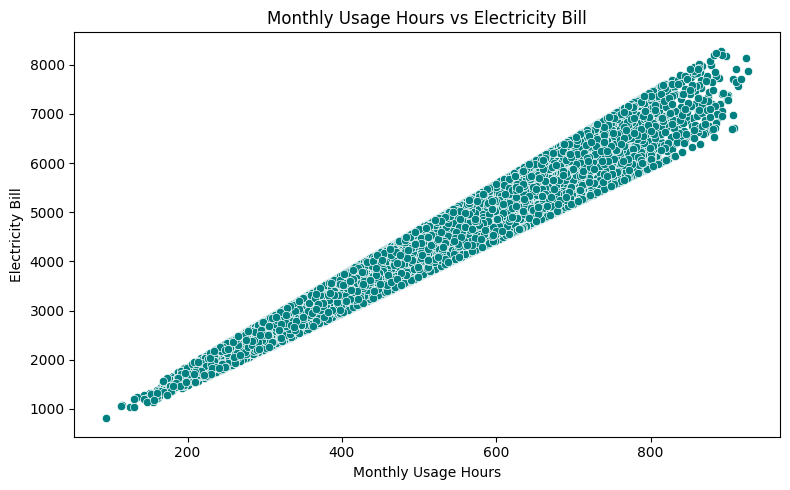

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: MonthlyUsageHours vs ElectricityBill
plt.figure(figsize=(8, 5))
sns.scatterplot(x='MonthlyHours', y='ElectricityBill', data=df, color='teal')
plt.title('Monthly Usage Hours vs Electricity Bill')
plt.xlabel('Monthly Usage Hours')
plt.ylabel('Electricity Bill')
plt.tight_layout()
plt.show()


/tmp/ipython-input-18-3074947074.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='ElectricityBill', data=df, palette='Set2')


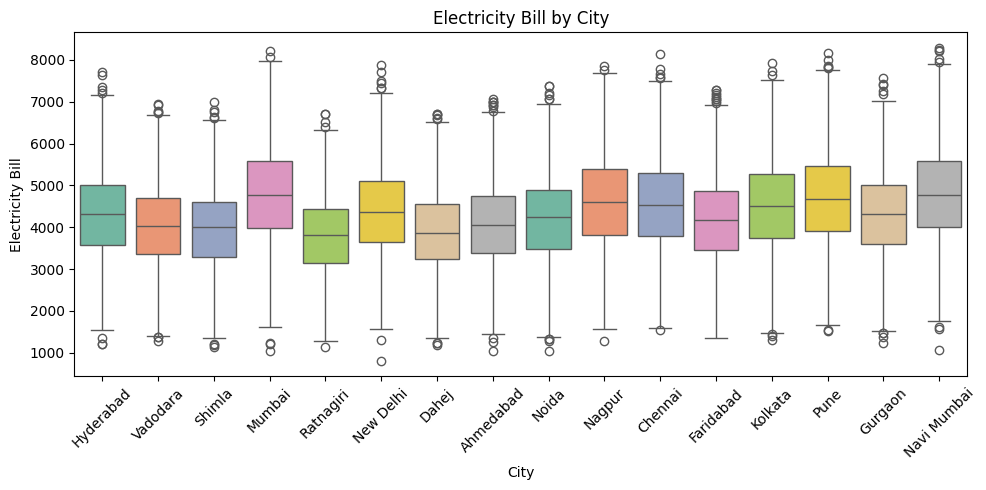

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='City', y='ElectricityBill', data=df, palette='Set2')
plt.title('Electricity Bill by City')
plt.xlabel('City')
plt.ylabel('Electricity Bill')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-19-3387891344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company', y='ElectricityBill', data=df, palette='Set3')


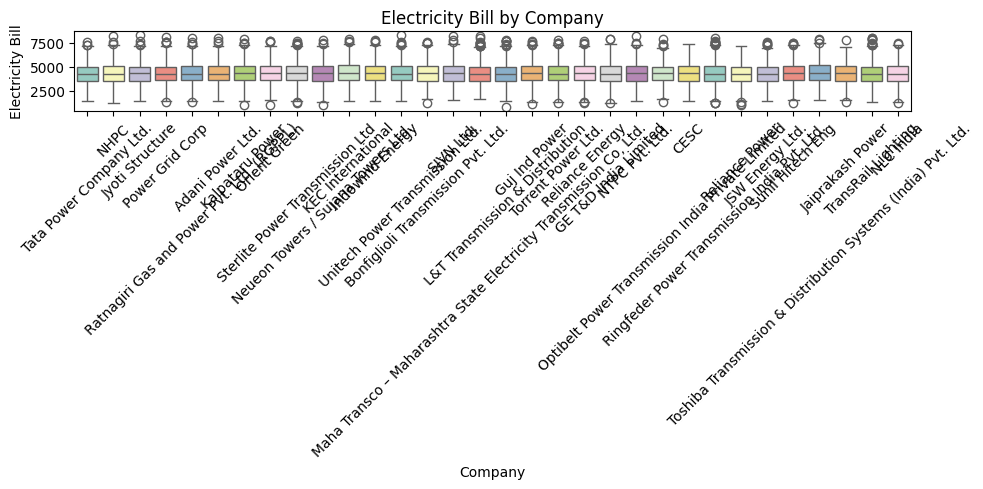

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Company', y='ElectricityBill', data=df, palette='Set3')
plt.title('Electricity Bill by Company')
plt.xlabel('Company')
plt.ylabel('Electricity Bill')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                      Fan  Refrigerator  AirConditioner  Television   Monitor  \
Fan              1.000000      0.563139        0.003201    0.005547  0.098622   
Refrigerator     0.563139      1.000000        0.010282    0.003906  0.085030   
AirConditioner   0.003201      0.010282        1.000000   -0.007846 -0.008240   
Television       0.005547      0.003906       -0.007846    1.000000 -0.000930   
Monitor          0.098622      0.085030       -0.008240   -0.000930  1.000000   
Month           -0.000672     -0.002973        0.004880    0.004757 -0.002397   
MonthlyHours     0.426497      0.392823        0.273721    0.429737  0.324485   
TariffRate       0.009861      0.002510        0.000116    0.008486 -0.001447   
ElectricityBill  0.410682      0.376816        0.261845    0.412651  0.309986   

                    Month  MonthlyHours  TariffRate  ElectricityBill  
Fan             -0.000672      0.426497    0.009861         0.410682  
Refrigerator    -0.002973      0.392823    0.00

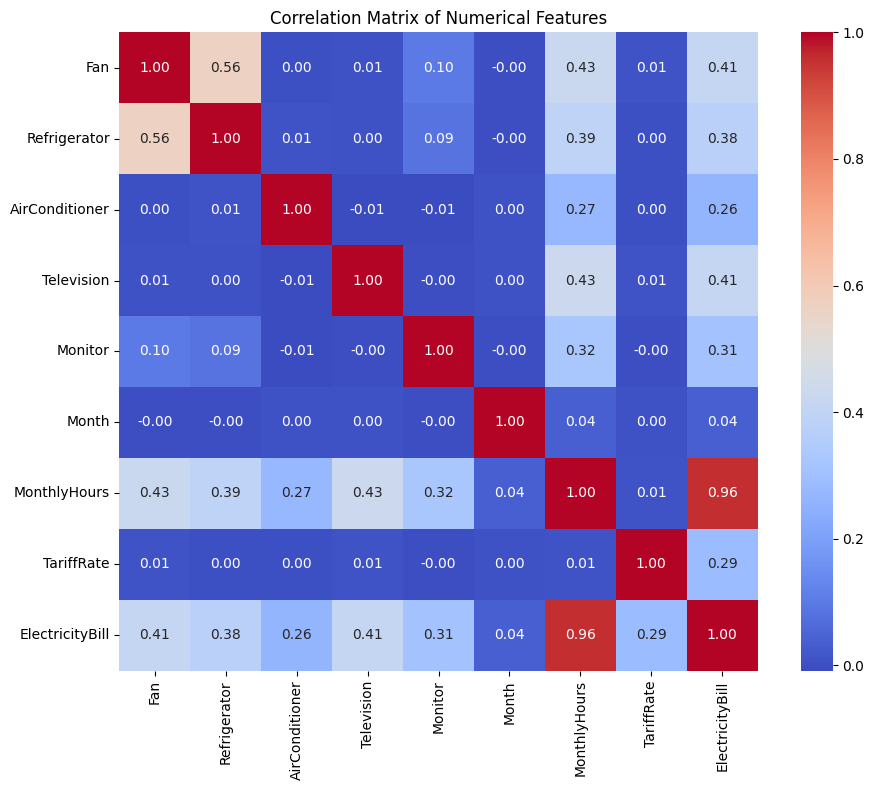

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Step 1: Select only numerical features
numerical_df = df.select_dtypes(include=['int64', 'float64'])

#drop the Motor pump column form numerical_df
numerical_df = numerical_df.drop('MotorPump', axis=1)
# Step 2: Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Step 3: Display full correlation matrix (optional)
print(correlation_matrix)

# Step 4: Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

- MonthlyHours	0.9587 ✅	🔥 Very strong linear relationship – most important feature.
- Television	0.4127 ✅	Moderate positive correlation
- Fan	0.4107 ✅	Moderate positive correlation
- Refrigerator	0.3768 ✅	Moderate correlation
- Monitor	0.3099 ✅	Moderate correlation
- TariffRate	0.2862 ✅	Moderate correlation; pricing affects bill
- AirConditioner	0.2618 ✅	Moderate correlation

In [30]:
# For 'City' and 'Company'
df_encoded = pd.get_dummies(df, columns=['City', 'Company'], drop_first=True)
# make it 0 or 1 instead of false or true

df_encoded = df_encoded.drop('MotorPump', axis=1)

In [32]:
df_encoded.head()
df=df_encoded

In [36]:
# Add up all appliances into a single feature
df['Total_Appliances'] = (
    df['Fan'] +
    df['Refrigerator'] +
    df['AirConditioner'] +
    df['Television'] +
    df['Monitor']
)

df['Appliance_Load_Factor'] = df['Total_Appliances'] * df['MonthlyHours']

df['Tariff_Usage_Interaction'] = df['TariffRate'] * df['MonthlyHours']


In [37]:
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,MonthlyHours,TariffRate,ElectricityBill,City_Chennai,...,Company_Sterlite Power Transmission Ltd,Company_Sunil Hitech Eng,Company_Tata Power Company Ltd.,Company_Torrent Power Ltd.,Company_Toshiba Transmission & Distribution Systems (India) Pvt. Ltd.,Company_TransRail Lighting,Company_Unitech Power Transmission Ltd.,Total_Appliances,Appliance_Load_Factor,Tariff_Usage_Interaction
0,16,23.0,2.0,6.0,1.0,10,384,8.4,3225.6,False,...,False,False,True,False,False,False,False,48.0,18432.0,3225.6
1,19,22.0,2.0,3.0,1.0,5,488,7.8,3806.4,False,...,False,False,False,False,False,False,False,47.0,22936.0,3806.4
2,7,20.0,2.0,6.0,7.0,7,416,7.7,3203.2,False,...,False,False,False,False,False,False,False,42.0,17472.0,3203.2
3,7,22.0,3.0,21.0,1.0,6,475,9.2,4370.0,False,...,False,False,False,False,False,False,False,54.0,25650.0,4370.0
4,11,23.0,2.0,11.0,1.0,2,457,9.2,4204.4,False,...,False,False,False,False,False,False,False,48.0,21936.0,4204.4


In [41]:
df.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'Month', 'MonthlyHours', 'TariffRate', 'ElectricityBill',
       'City_Chennai', 'City_Dahej', 'City_Faridabad', 'City_Gurgaon',
       'City_Hyderabad', 'City_Kolkata', 'City_Mumbai', 'City_Nagpur',
       'City_Navi Mumbai', 'City_New Delhi', 'City_Noida', 'City_Pune',
       'City_Ratnagiri', 'City_Shimla', 'City_Vadodara',
       'Company_Bonfiglioli Transmission Pvt. Ltd.', 'Company_CESC',
       'Company_GE T&D India Limited', 'Company_Guj Ind Power',
       'Company_Indowind Energy', 'Company_JSW Energy Ltd.',
       'Company_Jaiprakash Power', 'Company_Jyoti Structure',
       'Company_KEC International', 'Company_Kalpataru Power',
       'Company_L&T Transmission & Distribution',
       'Company_Maha Transco – Maharashtra State Electricity Transmission Co, Ltd.',
       'Company_NHPC', 'Company_NLC India', 'Company_NTPC Pvt. Ltd.',
       'Company_Neueon Towers / Sujana Towers Ltd.',
       'Compan

In [39]:
from sklearn.model_selection import train_test_split
X = df.drop('ElectricityBill', axis=1)
y = df['ElectricityBill']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define which columns are which
numeric_features = ['MonthlyUsageHours', 'TariffRate', 'Fan', 'Refrigerator', 'AC'] # etc.
categorical_features = ['City', 'Company']

# Create a preprocessor object
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Train and evaluate
pipeline.fit(X_train, y_train)